# Covariance and Correlation - Lab

In this lab, we shall working towards calculating covariance and correlation for a given dataset in python. We shall use the formulas shown in previous lesson and verify our results with python libraries.

## Objectives

You will be able to 
* Calculate and and interpret correlation and covariance for given variables
* Build density and scatter plots to visually identify the level of dependence between variables
* Perform covariance and correlation using python and numpy 

### Dataset

Included dataset (heightWeight.csv) includes 20 heights (inches) and weights(pounds). Yes, it is a particularly small dataset and will help us focus more on seeing covariance and correlation in action. At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances and standard deviations for this dataset.

But all of those measurements are only concerned with a **single variable**. What if we want to see: 

How height interacts with weight ? 

Does weight increase as height increases ?

Are Weight and Height not related at all ?

Note while there are plenty of fat short people and overly skinny tall people, but when you look at the population at large, taller people will tend to weigh more than shorter people. This generalization of information is very common as it shows you a bigger picture that you can build your intuitions upon.

Let's first load this dataset into pandas. Read the file "heightWeight.csv" and for header, length of the records and basic stats. 

In [4]:
# Load the dataset into pandas and perform basic inspection
import pandas as pd
df = pd.read_csv('heightWeight.csv')
print(len(df))
print(df.head())
print(df.describe())

# 20
#    height  Weight
# 0      68     165
# 1      71     201
# 2      61     140
# 3      69     170
# 4      71     192
#           height      Weight
# count  20.000000   20.000000
# mean   66.850000  165.800000
# std     5.112163   28.971129
# min    58.000000  115.000000
# 25%    63.250000  143.750000
# 50%    68.500000  170.000000
# 75%    71.000000  192.750000
# max    74.000000  210.000000

20
   height  Weight
0      68     165
1      71     201
2      61     140
3      69     170
4      71     192
          height      Weight
count  20.000000   20.000000
mean   66.850000  165.800000
std     5.112163   28.971129
min    58.000000  115.000000
25%    63.250000  143.750000
50%    68.500000  170.000000
75%    71.000000  192.750000
max    74.000000  210.000000


### Calculate covariance 

Here's the covariance formula once again. 

![](cov2.png)

We would use (n-1) due to the fact that we are working with samples of a bigger population here. 

#### Mean normalization 

But before we do this, we have to ensure the that both variables are **Mean Normalized** (as shown in the numerator above). i.e. both variables have mean values = 0 . This allows us to calculate how much they vary while disregarding their distance from each other. A bit like standardization that we saw before, but here we are not standardizing the spread (standard deviation), as that is what needs to be studied. So the formula to mean normalize a data set is : 

> **xi - X(mean)**

Pretty simple, take each element of the variable and subtract the mean value from it. This will create a new "mean-normalized" dataset. Let's write a function that takes in a vector, calculates the mean of vector and subtracts the calculated mean value from each element to calculate xi - X(mean). 

Hint: use `np.mean()` to calculate the mean for above formula 

In [5]:
import numpy as np

# Write a function to take in an iterable, calculate the mean and subtract the mean value
# from each element , creating and returning a new list. 

def mean_normalize(var):

    norm_vector = []
    n = 0
    mean = np.mean(var)
    
    for i in var:
        diff = var[n] - mean
        norm_vector.append(diff)
        n = n + 1
    
    return norm_vector

mean_normalize([1,2,3,4,5]), mean_normalize([11,22,33,44,55])

# ([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

Great so you see, our function maintains the variance of list elements and moves their mean to zero. As a quick test, we can visualize what exactly happens to the data with mean normalization. Plot the height variable distribution before and after the normalization process. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


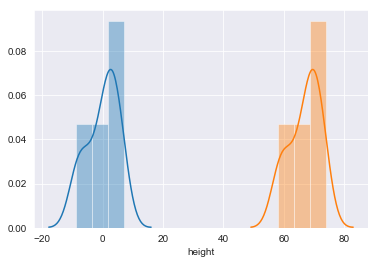

In [12]:
# Visualize the height data distribution before and after mean normalization 
height_norm = mean_normalize(df.height)
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(height_norm)
sns.distplot(df.height)


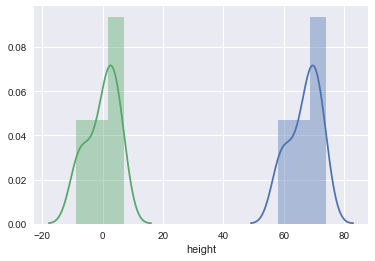

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


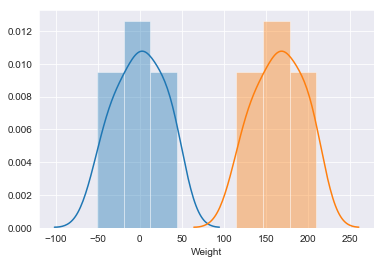

In [11]:
weight_norm = mean_normalize(df.Weight)
sns.distplot(weight_norm)
sns.distplot(df.Weight)


So there you go, not much changes in the shape of the data. Try repeating above with weight. 

#### The dot product

So now that we have our new normalized datasets. According to the numerator in the formula,we have to take the **DOT PRODUCT** of these two vector values. 
> A dot product is a linear algebraic operation that takes two equal-length sequences of numbers and returns a single number which can be used as a measure of similarity between these sequences (also known as vectors).

[Here is a great article explaining this in detail](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/). We will cover more of this in our section dedicated to linear algebra. 

For two vectors a and b, a dot product is calculated by multiplying each element of one vector to its counterpart in the second , and then adding them up together.  
```
 a[0] * b[0] + a[1] * b[1] + a[2] * b[2] ...

```

So lets write a function that will take two iterables and return their dot product. 

In [17]:
# Write a function to calculate the dot product of two iterables 

def dot_product(x,y):
    n=0
    vector = []
    
    for i in range(len(x)):
        calc = x[i]*y[i]
        vector.append(calc)
        n=n+1
    
    dot_prod = np.sum(vector)
    return dot_prod

a = [1,2,3]
b = [4,5,6]

dot_product(a,b)

#  32  calculated as (1*4 + 2*5 + 3*6)

32

So we have the numerator of the formula sorted out. Let's finally write a function `covariance()` that will take height and weight lists we created earlier and return the covariance value using the functions we created earlier. 

In [20]:
# Calculate covariance using functions above
# covariance = dot_product(mean_normalize())/n-1 and 
def covariance(var1, var2):

    if len(var1) != len(var2):
        return None
    
    else:
        x=mean_normalize(var1)
        y=mean_normalize(var2)
        
        result = dot_product(x,y)
        
        return result/((len(var1))-1)

# Uncomment below to check your function

covariance(df['height'], df['Weight'])

# 144.75789473684208

144.75789473684208

Let's verify our results with pandas built in `dataFrame.cov()` method.

In [21]:
# uncomment to run
df.cov()

,height,Weight
height,26.134211,144.757895
Weight,144.757895,839.326316


Okay so covariance (as well as correlation) are usually shown in matrix form. the covariance between height and weight is exactly what we calculated. the matrix also shows the covariance of a variable with itself. So this gives us magnitude which is a bit hard to interpret. How about we visualize height and weight on a scatter plot ! 

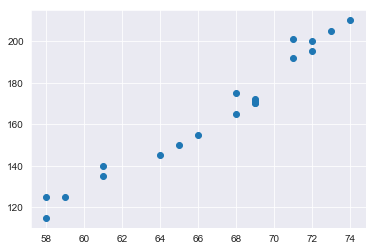

In [22]:
# Plot a scatter graph between height and weight to visually inspect the relationship 
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(df.height, df.Weight)
plt.show()

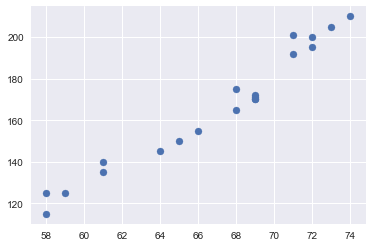

So we can see there is quite a bit of positive relationship between the two, but a covariance value is a bit hard to interpret. So let's try calculating correlation. 

### Calculate Correlation

Once again, heres the formula to calculate the correlation. 
![](cor.png)

lots of mean normalizations going on here. It shouldn't be too hard now to implement this using our functions above.

In [38]:
# Calculate Correlation between two variables using formula above
import math
def correlation(var1,var2):
    
    if len(var1) != len(var2):
        return None
    else:
        x = mean_normalize(var1)
        y = mean_normalize(var2)
        
         # Try the numpy way for calculating doc product
        var1_dot_var2 = [a * b for a, b in list(zip(x, y))]
        
        x_squared = [i * i for i in x]
        y_squared = [i * i for i in y]
        
        return np.round(sum(var1_dot_var2)/math.sqrt(sum(x_squared)*(sum(y_squared))), 2)

correlation(df['height'], df['Weight'])

# 0.98

0.98

Wow, 0.98, thats very close to one. So that means height and weight are like TOTALLY dependent on each other. Well, only for this particular sample. And there is a takeaway in this. sample size plays a major rule in determining the nature of a variable and its relationship with other variables. the set of 20 records we have seem to correlate highly, but this might be different for a different set of samples. We shall talk about how to further test such a finding to either reject it , or confirm it as a FACT. 

As a last check , let's use pandas `dataframe.corr()` method to see how that works. 

In [39]:
# uncomment to run
df.corr()

,height,Weight
height,1.0000,0.9774
Weight,0.9774,1.0000


Another matrix similar to above. And we see that a correlation of a variable to itself will always be = 1. The correlation between height and weight can be rounded off to our results. That is great. Now we know how this works. 

## Summary 

In this lab we saw how to calculate the covariance and correlation between variables. We also looked at mean normalization and dot products which will be revisited later in the course. FInally we saw how to calculate these measures using pandas built in methods. 